# [실습1] 퍼셉트론 작동 예시 구현하기

* 외출 여부를 판단하는 퍼셉트론 함수 작성하기
* x1, x2, w1, w2값에 따른 신호의 총합 계산 후 활성화 함수에 대입
* 외출 여부를 나타내는 y값(1: 외출한다, 0: 외출하지 않는다) 반환

In [1]:
'''

지시사항 1번
신호의 총합과 외출 여부를 반환하는 Perceptron 함수를 완성합니다.

   Step01. Bias는 외출을 좋아하는 정도이며
           -1로 설정되어 있습니다.
   
   Step02. 입력 받은 값과 Bias 값을 이용하여 신호의
           총합을 구합니다.
           
   Step03. 지시한 활성화 함수를 참고하여 외출 여부
           (0 or 1)를 반환합니다.

'''

def Perceptron(x_1,x_2,w_1,w_2):
    
    bias = -1

    output = x_1*w_1 + x_2*w_2 + bias
    
    if output>0:
        y = 1
    else:
        y = 0
    
    return output, y

In [2]:
# 값을 입력받는 함수입니다.

def input_func():
    
    # 비 오는 여부(비가 온다 : 1 / 비가 오지 않는다 : 0)
    x_1 =  int(input("x_1 : 비가 오는 여부(1 or 0)을 입력하세요."))
    
    # 여자친구가 만나자고 하는 여부(만나자고 한다 : 1 / 만나자고 하지 않는다 : 0)
    x_2 =  int(input("x_2 : 여친이 만나자고 하는 여부(1 or 0)을 입력하세요."))
    
    # 비를 좋아하는 정도의 값(비를 싫어한다 -5 ~ 5 비를 좋아한다)
    w_1 =  int(input("w_1 : 비를 좋아하는 정도 값(-5 ~ 5)을 입력하세요."))
    
    # 여자친구를 좋아하는 정도의 값(여자친구를 싫어한다 -5 ~ 5 비를 좋아한다)
    w_2 =  int(input("w_2 : 여친을 좋아하는 정도 값(-5 ~ 5)을 입력하세요."))
    
    return x_1, x_2, w_1, w_2

In [3]:
'''

지시사항 2번
실행 버튼을 눌러 x1, x2, w1, w2 값을 다양하게 입력해보고,
Perceptron함수에서 반환한 신호의 총합과 그에 따른 외출 여부를 확인해보세요

'''
    
def main():
    
    x_1, x_2, w_1, w_2 = input_func()
    
    result, go_out = Perceptron(x_1,x_2,w_1,w_2)
    
    print("\n신호의 총합 : %d" % result)
    
    if go_out > 0:
        print("외출 여부 : %d\n ==> 외출한다!" % go_out)
    else:
        print("외출 여부 : %d\n ==> 외출하지 않는다!" % go_out)
    
if __name__ == "__main__":
    main()

x_1 : 비가 오는 여부(1 or 0)을 입력하세요.1
x_2 : 여친이 만나자고 하는 여부(1 or 0)을 입력하세요.0
w_1 : 비를 좋아하는 정도 값(-5 ~ 5)을 입력하세요.3
w_2 : 여친을 좋아하는 정도 값(-5 ~ 5)을 입력하세요.2

신호의 총합 : 2
외출 여부 : 1
 ==> 외출한다!


# [실습2] 퍼셉트론 선형 분류기를 이용해 붓꽃 데이터 분류하기

* 사이킷런에서 제공하는 퍼셉트론 선형분류기와 붓꽃의 2가지 특징을 이용하여 붓꽃 품종 분류하기
* iris data: 사이킷런에서 제공하는 데이터셋
* data: 꽃의 정보를 저장
* target: 해당 꽃의 품종을 저장
* from sklearn.linear_model import Perceptron: Perceptron 모델 불러오기
* Perceptron(max_iter, eta0): Perceptron 모델 정의하기

In [5]:
import numpy as np

from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron

#import elice_utils
#eu = elice_utils.EliceUtils()

np.random.seed(100)

In [6]:
'''
1. iris 데이터를 불러오고, 
   불러온 데이터를 학습용, 테스트용 데이터로 
   분리하여 반환하는 함수를 구현합니다.
   
   Step01. 불러온 데이터를 학습용 데이터 80%, 
           테스트용 데이터 20%로 분리합니다.
           
           일관된 결과 확인을 위해 random_state를 
           0으로 설정합니다.        
'''

def load_data():
    
    iris = load_iris()
    
    X = iris.data[:,2:4]
    Y = iris.target
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
    
    return X_train, X_test, Y_train, Y_test

In [7]:
'''
2. 사이킷런의 Perceptron 클래스를 사용하여 
   Perceptron 모델을 정의하고,
   학습용 데이터에 대해 학습시킵니다.
   
   Step01. 앞서 완성한 함수를 통해 데이터를 불러옵니다.
   
   Step02. Perceptron 모델을 정의합니다.
           max_iter와 eta0를 자유롭게 설정해보세요.
   
   Step03. 학습용 데이터에 대해 모델을 학습시킵니다.
   
   Step04. 테스트 데이터에 대한 모델 예측을 수행합니다. 
'''

def main():   
    
    X_train, X_test, Y_train, Y_test = load_data()
    
    perceptron = Perceptron(max_iter=10000, eta0=0.0001)
    
    perceptron.fit(X_train, Y_train)
    
    pred = perceptron.predict(X_test)
    
    accuracy = accuracy_score(pred, Y_test)
    
    print("Test 데이터에 대한 정확도 : %0.5f" % accuracy)
    
    return X_train, X_test, Y_train, Y_test, pred

if __name__ == "__main__":
    main()

Test 데이터에 대한 정확도 : 0.93333


# [실습3] 다층 퍼셉트론으로 XOR gate 구현하기

* 단일 퍼셉트론 = 선형 분류기: AND, OR, NAND, NOR Gate
* 다층 퍼셉트론 = 비선형 분류기: XOR Gate
* XOR = AND(NAND, OR)

In [8]:
import numpy as np

In [9]:
'''

지시사항 1번
AND_gate 함수를 완성하세요. 

'''

def AND_gate(x1,x2):
    
    x = np.array([x1,x2])
    
    weight = np.array([1,1])
    
    bias = -1.5
    
    y = np.dot(x, weight) + bias

    return Step_Function(y)

In [10]:
'''

지시사항 2번
OR_gate 함수를 완성하세요.

'''

def OR_gate(x1,x2):
    
    x = np.array([x1,x2])
    
    weight = np.array([1,1])
    
    bias = -0.5
    
    y = np.dot(x, weight) + bias
    
    return Step_Function(y)

In [11]:
'''

지시사항 3번
NAND_gate 함수를 완성하세요.

'''

def NAND_gate(x1,x2):
    
    x = np.array([x1,x2])
    
    weight = np.array([-1,-1])
    
    bias = 1.5
    
    y = np.dot(x, weight) + bias
    
    return Step_Function(y) 

In [12]:
'''

지시사항 4번
Step_Function 함수를 완성하세요.

'''

def Step_Function(y):
    
    if y>=0:
        return 1
    else:
        return 0

In [13]:
'''

지시사항 5번
AND_gate, OR_gate, NAND_gate 함수들을
   활용하여 XOR_gate 함수를 완성하세요. 앞서 만든
   함수를 활용하여 반환되는 값을 정의하세요.

'''

def XOR_gate(x1, x2):
    
    z1 = NAND_gate(x1,x2)
    z2 = OR_gate(x1,x2)
    
    return AND_gate(z1, z2)

In [14]:
def main():
    
    # XOR gate에 넣어줄 Input
    array = np.array([[0,0], [0,1], [1,0], [1,1]])
    
    # XOR gate를 만족하는지 출력하여 확인
    print('XOR Gate 출력')
    
    for x1, x2 in array:
        print('Input: ',x1, x2, ', Output: ', XOR_gate(x1, x2))

if __name__ == "__main__":
    main()

XOR Gate 출력
Input:  0 0 , Output:  0
Input:  0 1 , Output:  1
Input:  1 0 , Output:  1
Input:  1 1 , Output:  0


# [미션] Fashion-MNIST 데이터 분류하기

* 각 이미지의 레이블에 맞게 분류하는 인공 신경망을 생성하기
* Fashion-MNIST: 의류, 가방, 신발 등의 패션 이미지들의 데이터셋
* 데이터 전처리: (28, 28)의 다차원 데이터 -> 1차원
* 학습/테스트데이터: 60,000개 중 4000개/10,000개 중 1000개 랜덤으로 추출

In [8]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

#import elice_utils
#eu = elice_utils.EliceUtils()

#np.random.seed(100)
#tf.random.set_seed(100)

In [9]:
def ANN_classifier(x_train, y_train):

    '''
    지시사항 1번
    인공 신경망 분류 모델을 생성합니다.
    '''
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(64, activation='relu'), # Input layer
        tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
        tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
        tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
        tf.keras.layers.Dense(10, activation='softmax') # Output layer
    ])
    
    '''
    지시사항 2번
    model 을 학습시킬 `optimizer`와 `loss`를 다음과 같이 설정하세요.
    '''
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    '''
    지시사항 3번
    학습할 `epochs` 값을 설정하여 train 데이터에 대한 학습을 진행합니다.
    '''
    model.fit(x_train, y_train, epochs=5)

    return model

Epoch 1/5
4000/4000 [==============================] - 1s 215us/sample - loss: 1.4536 - acc: 0.4740
Epoch 2/5
4000/4000 [==============================] - 1s 173us/sample - loss: 0.7137 - acc: 0.7458
Epoch 3/5
4000/4000 [==============================] - 1s 136us/sample - loss: 0.5795 - acc: 0.7922
Epoch 4/5
4000/4000 [==============================] - 1s 203us/sample - loss: 0.5300 - acc: 0.8145
Epoch 5/5
4000/4000 [==============================] - 1s 248us/sample - loss: 0.4821 - acc: 0.8322
1000/1000 - 0s - loss: 0.4209 - acc: 0.8570

- TEST 정확도 : 0.857


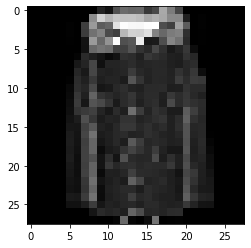

Label:  4.0
Prediction:  3


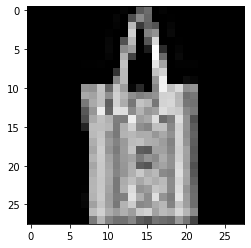

Label:  8.0
Prediction:  8


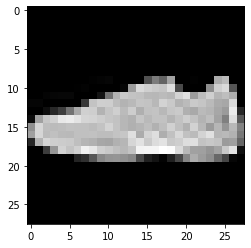

Label:  7.0
Prediction:  7


<Figure size 432x288 with 0 Axes>

In [10]:
def main():
    
    x_train = np.loadtxt('C:/Users/USER/Elice/data/train_images.csv', delimiter =',', dtype = np.float32)
    y_train = np.loadtxt('C:/Users/USER/Elice/data/train_labels.csv', delimiter =',', dtype = np.float32)
    x_test = np.loadtxt('C:/Users/USER/Elice/data/test_images.csv', delimiter =',', dtype = np.float32)
    y_test = np.loadtxt('C:/Users/USER/Elice/data/test_labels.csv', delimiter =',', dtype = np.float32)

    
    # 이미지 데이터를 0~1범위의 값으로 바꾸어 줍니다.
    x_train, x_test = x_train / 255.0, x_test / 255.0
    
    model = ANN_classifier(x_train,y_train)
    
    # 학습한 모델을 test 데이터를 활용하여 평가합니다.
    loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
    print('\n- TEST 정확도 :', test_acc)
    
    # 임의의 3가지 test data의 이미지와 레이블값을 출력하고 예측된 레이블값 출력
    predictions = model.predict(x_test)
    rand_n = np.random.randint(100, size=3)

    for i in rand_n:
        img = x_test[i].reshape(28,28)
        plt.imshow(img,cmap="gray")
        plt.show()
        plt.savefig("test.png")
        #eu.send_image("test.png")

        print("Label: ", y_test[i])
        print("Prediction: ", np.argmax(predictions[i]))
        
    
if __name__ == "__main__":
    main()